<a href="https://colab.research.google.com/github/addo561/Pytorch-book-chapters/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [77]:
#handle missing values
import pandas as pd
from io import StringIO
csv_data = \
 '''A,B,C,D
 1.0,2.0,3.0,4.0
 5.0,6.0,,8.0
 10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [78]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [79]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [80]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [81]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [82]:
#use imputer to fill or use fillna
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [83]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr= imr.fit(df.values)
data = imr.transform(df.values)
data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

handling Categorical data

In [84]:
df = pd.DataFrame([
    ['green','M',10,'class1'],
    ['red','L',11,'class2'],
    ['blue','XL',13,'class1'],
])

df.columns =  ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10,class1
1,red,L,11,class2
2,blue,XL,13,class1


In [85]:
map = {'XL':3,
       'L':2,
       'M':1}

In [86]:
df['size'] = df['size'].map(map)

In [87]:
df

,color,size,price,classlabel
0,green,1,10,class1
1,red,2,11,class2
2,blue,3,13,class1


In [88]:
inv = {v:k for k,v in map.items()}
df['size'].map(inv)

,size
0,M
1,L
2,XL


In [89]:
class_mapping = {label:idxs for idxs,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [90]:
df['classlabel']= df['classlabel'].map(class_mapping)

In [91]:
df

,color,size,price,classlabel
0,green,1,10,0
1,red,2,11,1
2,blue,3,13,0


In [92]:
inv = {v:k for k,v in class_mapping.items()}
df['classlabel']= df['classlabel'].map(inv)

In [93]:
df

,color,size,price,classlabel
0,green,1,10,class1
1,red,2,11,class2
2,blue,3,13,class1


In [94]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
y = le.fit_transform(df.classlabel.values)

In [95]:
y

array([0, 1, 0])

In [96]:
le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [97]:
X = df[['color', 'size', 'price']].values

In [98]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[1, 1, 10],
       [2, 2, 11],
       [0, 3, 13]], dtype=object)

In [99]:
ohe = OneHotEncoder()
ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [100]:
#col tranformer
from sklearn.compose import ColumnTransformer
c_tranf = ColumnTransformer([
    ('onehot',OneHotEncoder(),[0]),
    ('nothing','passthrough',[1,2])

])

c_tranf.fit_transform(X).astype(float)

array([[ 0.,  1.,  0.,  1., 10.],
       [ 0.,  0.,  1.,  2., 11.],
       [ 1.,  0.,  0.,  3., 13.]])

In [101]:
#use dummy
pd.get_dummies(df[['price', 'color', 'size']],drop_first=True)

,price,size,color_green,color_red
0,10,1,True,False
1,11,2,False,True
2,13,3,False,False


In [102]:
#col tranformer
from sklearn.compose import ColumnTransformer
c_tranf = ColumnTransformer([
    ('onehot',OneHotEncoder(categories='auto',drop='first'),[0]),
    ('nothing','passthrough',[1,2])

])

c_tranf.fit_transform(X).astype(float)

array([[ 1.,  0.,  1., 10.],
       [ 0.,  1.,  2., 11.],
       [ 0.,  0.,  3., 13.]])

In [103]:
df = pd.DataFrame([
    ['green','M',10,'class1'],
    ['red','L',11,'class2'],
    ['blue','XL',13,'class1'],
])

df.columns =  ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10,class1
1,red,L,11,class2
2,blue,XL,13,class1


In [104]:
df['x > M'] = df['size'].apply(lambda x :  1 if x in {'L','XL'} else 0)
df['x > L'] = df['size'].apply(lambda x :  1 if x =='XL' else 0)

In [105]:
df

,color,size,price,classlabel,x > M,x > L
0,green,M,10,class1,0,0
1,red,L,11,class2,1,0
2,blue,XL,13,class1,1,1


splitting datasets

In [106]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
 'machine-learning-databases/wine/wine.data',
 header=None)

In [107]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
df_wine.columns = ['Class label', 'Alcohol',
'Malic acid', 'Ash',
'Alcalinity of ash', 'Magnesium',
'Total phenols', 'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity', 'Hue',
'OD280/OD315 of diluted wines',
'Proline']

In [109]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Train_test_split

In [110]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [111]:
X_train.shape

(124, 13)

In [112]:
X_test.shape

(54, 13)

Scaling

In [113]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [114]:
X_train[:3]

array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
        8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
        2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, 2.250e+01, 1.010e+02, 3.000e+00,
        3.250e+00, 2.900e-01, 2.380e+00, 5.700e+00, 1.190e+00, 2.710e+00,
        1.285e+03]])

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [116]:
X_train_sc[:3]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866]])

In [117]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.transform(X_test)

In [118]:
X_train_rs[:3]

array([[ 0.41651032,  2.00322581, -0.05797101,  0.11904762, -0.30136986,
        -0.39613527, -0.82105263,  0.75362319, -0.8041958 , -0.11666667,
        -0.16666667, -0.65245203, -0.23094904],
       [ 0.52157598, -0.20322581,  0.95652174,  0.        ,  1.89041096,
         0.52173913,  0.34586466,  0.92753623, -0.34265734,  0.21666667,
         0.86363636,  0.15778252,  1.05002338],
       [ 0.49906191, -0.22258065,  0.95652174,  0.71428571,  0.19178082,
         0.57004831,  0.65263158, -0.28985507,  1.0979021 ,  0.31666667,
         0.68181818, -0.08955224,  1.14352501]])

In [131]:
##SBS -> sequiential backward selection
from sklearn.metrics import accuracy_score
import numpy as np
from itertools import combinations
from sklearn.base import clone

class SBS:
  def __init__(self,k_features,estimator,scoring=accuracy_score,test_size=0.2):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size

  def fit(self,X,y):
      X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=self.test_size,random_state=1)
      dim = X_train.shape[1]#take features
      self.indices_ = tuple(range(dim))#get indexes of cols
      self.subsets_ = [self.indices_]
      score = self._calc_score(X_train,X_test,y_train,y_test,self.indices_)
      self.scores = [score]

      while dim > self.k_features:
        scores = []
        subsets = []

        for p in combinations(self.indices_,r=dim-1):
          score= self._calc_score(X_train,X_test,y_train,y_test,p)
          scores.append(score)
          subsets.append(p)

        best = np.argmax(scores)
        self.indices_ = subsets[best]
        self.subsets_.append(self.indices_)
        dim -= 1

        self.scores.append(scores[best])
        self.k_score = self.scores[-1]

      return self

  def transform(self,X):
      return X[:,self.indices_]

  def _calc_score(self, X_train, X_test, y_train,y_test, indices):
    self.estimator.fit(X_train[:,indices],y_train)
    y_pred = self.estimator.predict(X_test[:,indices])
    accuracy = self.scoring(y_test,y_pred)
    return accuracy



In [132]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(k_features=3,estimator=knn)
sbs.fit(X_train_sc,y_train)

In [134]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 5, 7, 11),
 (0, 2, 5, 7, 11),
 (0, 2, 7, 11),
 (0, 2, 11)]

In [136]:
sbs.indices_

(0, 2, 11)

In [139]:
sbs.scores

[0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.96, 0.96, 0.92]

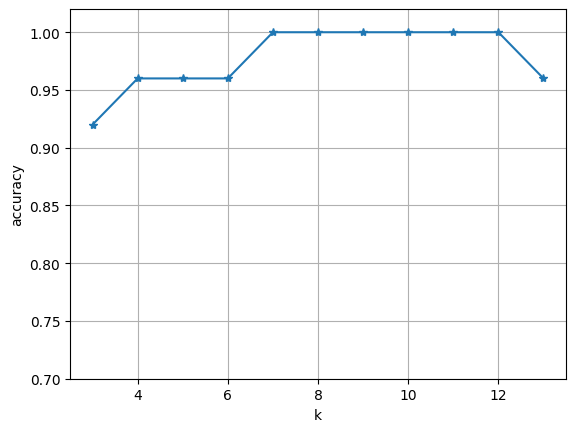

In [138]:
#plotting len of features and accuracy
k_feats = [len(k) for k in sbs.subsets_]
plt.plot(k_feats,sbs.scores,marker='*')
plt.ylim([0.7, 1.02])
plt.ylabel('accuracy')
plt.xlabel('k')
plt.grid()
plt.show()

In [145]:
df_wine.iloc[:5,1]

,Alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24


In [163]:
#display cols
col_indices = list(sbs.subsets_[10])
print([df_wine.columns[1:][i] for i in col_indices])

['Alcohol', 'Ash', 'OD280/OD315 of diluted wines']


In [160]:
df_wine.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [166]:
#feature importance
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [169]:
for i in range(X_train.shape[1]):
  print(f'{i + 1}){feat_labels[indices[i]]} -> {importances[indices[i]]}')
  if i ==4:break

1)Proline -> 0.18545260453273973
2)Flavanoids -> 0.17475097557788732
3)Color intensity -> 0.14391990337231414
4)OD280/OD315 of diluted wines -> 0.1361619442214559
5)Alcohol -> 0.11852941731789315
